In [ ]:
# Question qu'on souhaite répondre : Quel est l'impact des deux groupes sur les taux de clics des utilisateurs ?

In [8]:
pwd

'/Users/yaha/Documents'

In [9]:
import pandas as pd

In [20]:
df = pd.read_csv('ab_test_results.csv', sep=',')
df

,user_id,group,views,clicks
0,1,control,10.0,0.0
1,2,control,1.0,0.0
2,3,control,1.0,0.0
3,4,control,2.0,0.0
4,5,control,3.0,0.0
...,...,...,...,...
119995,119996,test,9.0,0.0
119996,119997,test,2.0,1.0
119997,119998,test,20.0,1.0
119998,119999,test,6.0,1.0


In [21]:
#Détection des valeurs manquantes
df.isnull().sum()

user_id    0
group      0
views      0
clicks     0
dtype: int64

In [22]:
#Informations sur la dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  120000 non-null  int64  
 1   group    120000 non-null  object 
 2   views    120000 non-null  float64
 3   clicks   120000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [11]:
df.duplicated().sum()

0

In [24]:
df.describe()

,user_id,views,clicks
count,120000.000000,120000.000000,120000.000000
mean,60000.500000,4.991075,0.182692
std,34641.160489,5.915200,0.472547
min,1.000000,1.000000,0.000000
25%,30000.750000,2.000000,0.000000
50%,60000.500000,3.000000,0.000000
75%,90000.250000,6.000000,0.000000
max,120000.000000,205.000000,9.000000


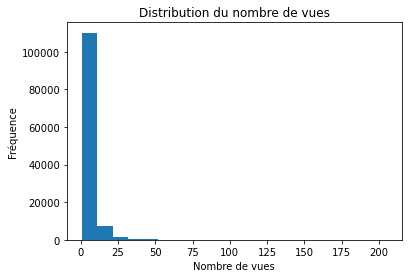

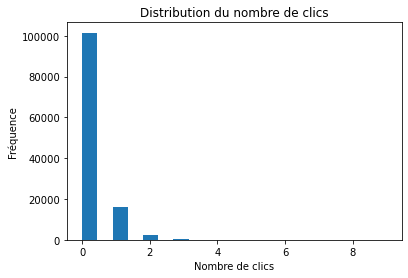

In [26]:
import matplotlib.pyplot as plt

plt.hist(df["views"], bins=20)
plt.xlabel("Nombre de vues")
plt.ylabel("Fréquence")
plt.title("Distribution du nombre de vues")
plt.show()

plt.hist(df["clicks"], bins=20)
plt.xlabel("Nombre de clics")
plt.ylabel("Fréquence")
plt.title("Distribution du nombre de clics")
plt.show()

In [27]:
df["group"].value_counts()

control    60000
test       60000
Name: group, dtype: int64

In [29]:
#séparer les données en deux groupes différents, selon la variable "group"

control_group = df[df['group'] == 'control']
test_group = df[df['group'] == 'test']

In [31]:
control_group.head(5)

,user_id,group,views,clicks
0,1,control,10.0,0.0
1,2,control,1.0,0.0
2,3,control,1.0,0.0
3,4,control,2.0,0.0
4,5,control,3.0,0.0


In [32]:
test_group.head(5)

,user_id,group,views,clicks
60000,60001,test,2.0,0.0
60001,60002,test,8.0,0.0
60002,60003,test,12.0,0.0
60003,60004,test,2.0,0.0
60004,60005,test,7.0,1.0


In [33]:
#diviser le nombre total de clics par le nombre total pour calculer le taux de clics moyen pour chaque groupe

control_click_through_rate = control_group['clicks'].sum() / control_group['views'].sum()
test_click_through_rate = test_group['clicks'].sum() / test_group['views'].sum()

In [34]:
control_click_through_rate

0.03467342433298334

In [35]:
test_click_through_rate

0.03850423314611395

In [36]:
#calculer le nombre moyen de vues par utilisateur pour chaque groupe
control_views_per_user = control_group['views'].sum() / len(control_group['user_id'].unique())
test_views_per_user = test_group['views'].sum() / len(test_group['user_id'].unique())

In [37]:
# comparer les résultats entre les deux groupes

print("Click-Through Rate: {:.2%}".format(control_click_through_rate))
print("Views per User: {:.2f}\n".format(control_views_per_user))

print("Test Group:")
print("Click-Through Rate: {:.2%}".format(test_click_through_rate))
print("Views per User: {:.2f}".format(test_views_per_user))

Control Group:
Click-Through Rate: 3.47%
Views per User: 4.95

Test Group:
Click-Through Rate: 3.85%
Views per User: 5.03


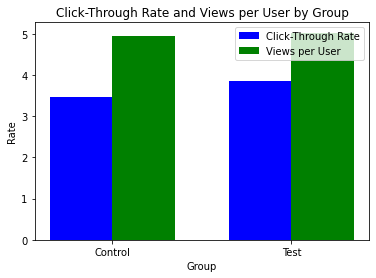

In [52]:
# afficher les taux de clics et de vues pour chaque groupe dans un graphique

import matplotlib.pyplot as plt
import numpy as np

# Données à visualiser
control_ctrs = 3.47
test_ctrs = 3.85
control_views = 4.95
test_views = 5.03

# Création des barres
ctrs = [control_ctrs, test_ctrs]
views = [control_views, test_views]
bar_width = 0.35
index = np.arange(2)

# Création de la figure
fig, ax = plt.subplots()
rects1 = ax.bar(index, ctrs, bar_width, color='b', label='Click-Through Rate')
rects2 = ax.bar(index + bar_width, views, bar_width, color='g', label='Views per User')

# Ajout des étiquettes, de la légende et des titres
ax.set_xlabel('Group')
ax.set_ylabel('Rate')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Control', 'Test'))
ax.legend()
plt.title('Click-Through Rate and Views per User by Group')

# Affichage du graphique
plt.show()


Les résultats indiquent que le groupe test a un taux de clics moyen de 3,85%, tandis que le groupe de contrôle a un taux de clics moyen de 3,47%. 

Le taux de clics du groupe test est donc légèrement plus élevé que celui du groupe de contrôle.

les résultats montrent également que le nombre moyen de vues par utilisateur est légèrement plus élevé dans le groupe test (5,03) que dans le groupe de contrôle (4,95). Cela suggère que les utilisateurs du groupe test ont peut-être été exposés à plus de contenu, ce qui pourrait expliquer leur taux de clics plus élevé.